In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
try: # set up path
    import google.colab, sys
    sys.path.append('/content/drive/MyDrive/stylegan/rewriting')
except:
    import sys
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))
    display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
    display(HTML("<style>.rwa { width:100% !important; }</style>"))
    sys.path.append('../labeler')
    pass

In [2]:
from utils import show, labwidget
from labeler import labelerapp
import glob
import cv2
import matplotlib.pyplot as plt
import ntpath

import copy, os, json
import numpy as np

# FILENAME = "20201116_045153.mp4"
# IMPORT_FILES = "../../dataset/data/ina_id/raw/videos/"+FILENAME
# IMPORT_FILES = "drive/MyDrive/stylegan/rewriting/data/ina_id/raw/videos/"+FILENAME

IMPORT_FILES = "../dataset/data/ina_id/raw/raw_selfie/*"
save_image_dir = "../dataset/data/ina_id/temp/images/raw_selfie/"
save_anotation_dir = "../dataset/data/ina_id/temp/ground_truth/raw_selfie/"

In [3]:
def get_image_from_directory(img_path):
  img_list = []
  
  for file_path in glob.glob(img_path):
    raw = cv2.imread(file_path)
    img_list.append({'img':raw,'filename':ntpath.basename(file_path).split('.')[0]})
  
  return img_list

In [4]:
images = get_image_from_directory(IMPORT_FILES)

In [5]:
images_dict = []
for image in images:
    raw = cv2.cvtColor(image['img'], cv2.COLOR_BGR2RGB)
    height, width = raw.shape[:2]
    img = raw.copy()
    if (height > 1400) or (width > 1400):
        img = cv2.resize(img, (0,0), fx=0.25, fy=0.25)
    elif (height > 700) or (width > 700):
        img = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
        
    h, w = img.shape[:2]
    mask = np.zeros(img.shape, dtype=np.uint8)
    images_dict.append({'img':img, 'mask':mask, "height": h, "width": w, 'filename':image['filename']})

In [6]:
def get_image_from_video(video_path):
  img_list = []
  cap = cv2.VideoCapture(video_path)

  while(1):
    ret, frame = cap.read()
    if ret == True:
      frame = cv2.rotate(frame, cv2.cv2.ROTATE_90_CLOCKWISE)
      img_list.append(frame)
    else:
      break

  return img_list


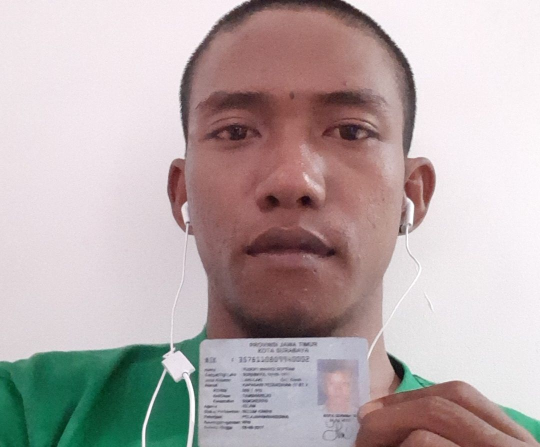
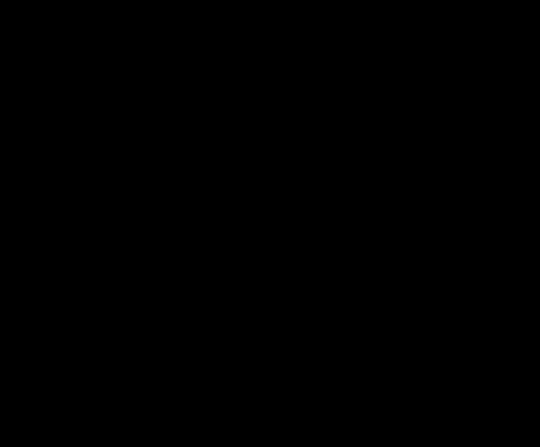

In [7]:
# Display a user interface
interface = labelerapp.LabelerApp(save_image_dir=save_image_dir,save_anotation_dir=save_anotation_dir, images=images_dict, max_height=500)
show(interface)